In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import chess
from IPython.display import clear_output
from time import sleep

%matplotlib inline

In [19]:
def to_line(left,right) -> str:
    out_str = ""
    if type(left) != str:
        sleft = str(round(left,3))
        if len(sleft) < 4:
            sleft = " " + sleft
        out_str += sleft
    else:
        out_str += "----"
    out_str += "  "
    if type(right) != str:
        sright = str(round(right,3))
        if right > 0:
            out_str += " "
        if len(sright) < 4:
            sright = " "+sright
        out_str += sright
    else:
        out_str += " ----"
    return out_str

def STOCKFISHPRINT(df: pd.DataFrame, ind: int):
    row = df.iloc[ind]
#     wmatstr    = to_line(row['materialWhiteMG'], row['materialWhiteEG'])
    wmatstr    = to_line("-", "-")
    bmatstr    = to_line("-", "-")
    tmatstr    = to_line(row['materialTotalMG'], row['materialTotalEG'])
    
    wimbstr    = to_line("-", "-")
    bimbstr    = to_line("-", "-")
    timbstr    = to_line(row["imbalanceTotalMG"], row["imbalanceTotalEG"])
    
    winitstr   = to_line("-", "-")
    binitstr   = to_line("-", "-")
    tinitstr   = to_line(row["initiativeTotalMG"], row["initiativeTotalEG"])
    
    wpawnstr   = to_line(row['pawnWhiteMG'], row['pawnWhiteEG'])
    bpawnstr   = to_line(row['pawnBlackMG'], row['pawnBlackEG'])
    tpawnstr   = to_line(row['pawnTotalMG'], row['pawnTotalEG'])
    
    wknightstr = to_line(row['knightWhiteMG'], row['knightWhiteEG'])
    bknightstr = to_line(row['knightBlackMG'], row['knightBlackEG'])
    tknightstr = to_line(row['knightTotalMG'], row['knightTotalEG'])
    
    wbishopstr = to_line(row['bishopWhiteMG'], row['bishopWhiteEG'])
    bbishopstr = to_line(row['bishopBlackMG'], row['bishopBlackEG'])
    tbishopstr = to_line(row['bishopTotalMG'], row['bishopTotalEG'])
    
    wrookstr   = to_line(row['rookWhiteMG'], row['rookWhiteEG'])
    brookstr   = to_line(row['rookBlackMG'], row['rookBlackEG'])
    trookstr   = to_line(row['rookTotalMG'], row['rookTotalEG'])
    
    wqueenstr  = to_line(row['queenWhiteMG'], row['queenWhiteEG'])
    bqueenstr  = to_line(row['queenBlackMG'], row['queenBlackEG'])
    tqueenstr  = to_line(row['queenTotalMG'], row['queenTotalEG'])
    
    wmobistr   = to_line(row['mobilityWhiteMG'], row['mobilityWhiteEG'])
    bmobistr   = to_line(row['mobilityBlackMG'], row['mobilityBlackEG'])
    tmobistr   = to_line(row['mobilityTotalMG'], row['mobilityTotalEG'])
    
    wkingstr   = to_line(row['kingWhiteMG'], row['kingWhiteEG'])
    bkingstr   = to_line(row['kingBlackMG'], row['kingBlackEG'])
    tkingstr   = to_line(row['kingTotalMG'], row['kingTotalEG'])
    
    wthreatstr = to_line(row['threatWhiteMG'], row['threatWhiteEG'])
    bthreatstr = to_line(row['threatBlackMG'], row['threatBlackEG'])
    tthreatstr = to_line(row['threatTotalMG'], row['threatTotalEG'])
    
    wpassedstr = to_line(row['passedWhiteMG'], row['passedWhiteEG'])
    bpassedstr = to_line(row['passedBlackMG'], row['passedBlackEG'])
    tpassedstr = to_line(row['passedTotalMG'], row['passedTotalEG'])
    
    wspacestr  = to_line(row['spaceWhiteMG'], row['spaceWhiteEG'])
    bspacestr  = to_line(row['spaceBlackMG'], row['spaceBlackEG'])
    tspacestr  = to_line(row['spaceTotalMG'], row['spaceTotalEG'])
    
    wtotalstr  = to_line("-", "-")
    btotalstr  = to_line("-", "-")
    ttotalstr  = to_line(row['totalTotalMG'], row['totalTotalEG'])
    
    print("{:^13} |{:^13}|{:^13}|{:^13}".format("Term","White","Black","Total"))
    print("{:^13} |{:^13}|{:^13}|{:^13}".format("","MG    EG","MG    EG","MG    EG"))
    print("{:-<14}+{:-<13}+{:-<13}+{:-<13}".format("","","",""))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Material",wmatstr,bmatstr,tmatstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Imbalance",wimbstr,bimbstr,timbstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Initiative",winitstr,binitstr,tinitstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Pawns",wpawnstr,bpawnstr,tpawnstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Knights",wknightstr,bknightstr,tknightstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Bishops",wbishopstr,bbishopstr,tbishopstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Rooks",wrookstr,brookstr,trookstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Queens",wqueenstr,bqueenstr,tqueenstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Mobility",wmobistr,bmobistr,tmobistr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("King Safety",wkingstr,bkingstr,tkingstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Threats",wthreatstr,bthreatstr,tthreatstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Passed",wpassedstr,bpassedstr,tpassedstr))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Space",wspacestr,bspacestr,tspacestr))
    print("{:-<14}+{:-<13}+{:-<13}+{:-<13}".format("","","",""))
    print("{:>13} |{:^13}|{:^13}|{:^13}".format("Total",wtotalstr,btotalstr,ttotalstr))

    board = chess.Board(row.name)
    print(board)

def print_row(df:pd.DataFrame, idx:int):
    row = df.iloc[idx]
    
    kingw   = to_line(row['kingwmg'], row['kingweg'])
    kingb   = to_line(row['kingbmg'], row['kingbeg'])
    pawnw   = to_line(row['pawnwmg'], row['pawnweg'])
    pawnb   = to_line(row['pawnbmg'], row['pawnbeg'])
    
    
    print("+{:-<42}+".format(""))
    print("|{:^13} |{:^13}|{:^13}|".format("Term","White","Black"))
    print("|{:^13} |{:^13}|{:^13}|".format("","MG    EG","MG    EG"))
    print("|{:-<14}+{:-<13}+{:-<13}|".format("","",""))
    print("|{:>13} |{:^13}|{:^13}|".format("King",kingw,kingb))
    print("|{:>13} |{:^13}|{:^13}|".format("Pawn",pawnw,pawnb))
    print("|{:-<14}+{:-<13}+{:-<13}|".format("","",""))
    print("+{:-<42}+".format(""))

    board = chess.Board(row.name)
    print(board)

df = pd.read_csv("../data/data.csv")

df.set_index("fen",inplace=True)
df.head()
print_row(df,2)

+------------------------------------------+
|    Term      |    White    |    Black    |
|              |  MG    EG   |  MG    EG   |
|--------------+-------------+-------------|
|         King |  150   -11  |  145   -11  |
|         Pawn |  134   -18  |  112   -24  |
|--------------+-------------+-------------|
+------------------------------------------+
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . . . .
P . P P P P P P
R N B Q K B N R


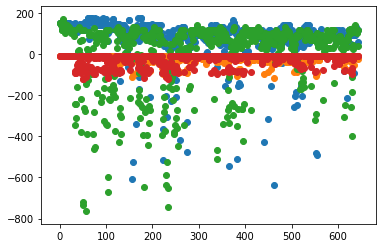

In [28]:
plt.scatter(range(len(df)),df.kingwmg)
plt.scatter(range(len(df)),df.kingweg)
plt.scatter(range(len(df)),df.kingbmg)
plt.scatter(range(len(df)),df.kingbeg)

In [29]:
df.sample()

,kingwmg,kingweg,kingbmg,kingbeg,pawnwmg,pawnweg,pawnbmg,pawnbeg
fen,,,,,,,,
rnbqkbnr/pppp1ppp/4p3/8/3P4/8/PPP1PPPP/RNBQKBNR w KQkq - 0 2,81,-35,102,-11,98,-21,148,-21


In [ ]:

rnbqkbnr/ppp1pppp/8/3P4/Q3P3/8/PP1P1PPP/RNB1KBNR w KQkq - 0 1,118,-11,-301,-83,149,24,105,-23
